In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
# 우리나라 기후

In [60]:
df = pd.read_csv('./국내기후(백령도제외).csv', index_col=0)
df

,시간,관측지점,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1990-01-01,서울,-1.7,-4.0,1.8,0.0,0.0,7.3,270.0,5.0,...,4.58,0.0,0.0,0.0,3.5,3.6,-1.5,2.721902,0.9,0.0
1,1990-01-02,서울,-3.5,-5.7,-0.9,0.0,0.1,8.6,290.0,4.8,...,3.44,0.1,0.1,0.1,3.5,3.8,-2.9,2.721902,0.8,0.0
2,1990-01-03,서울,-5.0,-7.2,-1.7,0.0,0.0,8.2,290.0,5.0,...,7.63,0.0,0.0,0.0,0.0,0.0,-4.4,2.721902,1.4,0.0
3,1990-01-04,서울,-3.3,-8.9,2.1,0.0,0.0,6.1,290.0,3.0,...,5.84,0.0,0.0,0.0,0.5,1.8,-3.6,2.721902,1.0,0.0
4,1990-01-05,서울,0.7,-2.4,2.1,0.0,3.2,12.3,290.0,7.2,...,0.36,0.6,0.6,0.6,9.0,3.6,-0.6,2.721902,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2021-12-27,제주,4.1,0.8,6.5,0.0,0.1,12.8,20.0,6.8,...,1.37,0.5,1.2,0.5,8.1,8.1,3.9,1.000000,1.4,0.0
11684,2021-12-28,제주,7.2,5.9,8.4,0.0,0.0,9.1,360.0,5.3,...,0.91,0.0,0.0,0.0,8.3,8.0,5.6,0.900000,1.3,0.0
11685,2021-12-29,제주,9.3,6.6,11.5,0.0,0.4,12.8,340.0,7.9,...,4.94,0.0,0.0,0.0,8.5,7.8,6.9,2.300000,3.3,0.0
11686,2021-12-30,제주,6.9,5.8,8.4,0.0,0.0,18.1,340.0,10.1,...,4.85,0.0,0.0,0.0,8.0,8.0,5.9,2.300000,3.2,0.0


In [61]:
df['관측지점'].unique()

array(['서울', '강릉', '춘천', '청주', '전주', '광주', '대구', '제주'], dtype=object)

In [62]:
df['시간'] = pd.to_datetime(df['시간'], format='%Y-%m-%d')

In [63]:
# df[df['시간'].dt.year > 1995]
df_k = df[df['시간'].dt.year > 1995]
df_k = df_k.reset_index()
df_k.drop('index', axis=1, inplace=True)

In [64]:
df_k

,시간,관측지점,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1996-01-01,서울,-3.2,-7.9,2.5,0.0,0.0,6.0,340.0,3.5,...,7.99,0.0,0.0,0.0,0.0,0.1,-3.1,2.721902,1.6,0.0
1,1996-01-02,서울,0.2,-3.9,3.9,0.0,0.0,9.3,230.0,3.8,...,2.04,0.0,0.0,0.0,7.3,7.5,-1.4,2.721902,2.1,0.0
2,1996-01-03,서울,-4.5,-8.5,5.5,0.0,0.0,17.5,270.0,8.2,...,9.16,0.0,0.0,0.0,2.5,0.8,-2.5,2.721902,1.7,0.0
3,1996-01-04,서울,-5.4,-10.7,-0.1,0.0,0.0,7.1,270.0,3.5,...,7.68,0.0,0.0,0.0,1.5,2.0,-4.5,2.721902,1.9,0.0
4,1996-01-05,서울,-0.1,-2.1,2.0,0.0,2.0,7.8,70.0,3.7,...,0.98,0.0,0.0,0.0,10.0,6.5,-0.6,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75971,2021-12-27,제주,4.1,0.8,6.5,0.0,0.1,12.8,20.0,6.8,...,1.37,0.5,1.2,0.5,8.1,8.1,3.9,1.000000,1.4,0.0
75972,2021-12-28,제주,7.2,5.9,8.4,0.0,0.0,9.1,360.0,5.3,...,0.91,0.0,0.0,0.0,8.3,8.0,5.6,0.900000,1.3,0.0
75973,2021-12-29,제주,9.3,6.6,11.5,0.0,0.4,12.8,340.0,7.9,...,4.94,0.0,0.0,0.0,8.5,7.8,6.9,2.300000,3.3,0.0
75974,2021-12-30,제주,6.9,5.8,8.4,0.0,0.0,18.1,340.0,10.1,...,4.85,0.0,0.0,0.0,8.0,8.0,5.9,2.300000,3.2,0.0


In [65]:
df_seoul = df_k[df_k['관측지점'] == '서울']
df_seoul

,시간,관측지점,평균 기온,최저 기온,최고 기온,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,...,합계 일사,일 최심신적설,일 최심적설,합계 3시간 신적설,평균 전운량,평균 중하층운량,평균 지면온도,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1996-01-01,서울,-3.2,-7.9,2.5,0.0,0.0,6.0,340.0,3.5,...,7.99,0.0,0.0,0.0,0.0,0.1,-3.1,2.721902,1.6,0.0
1,1996-01-02,서울,0.2,-3.9,3.9,0.0,0.0,9.3,230.0,3.8,...,2.04,0.0,0.0,0.0,7.3,7.5,-1.4,2.721902,2.1,0.0
2,1996-01-03,서울,-4.5,-8.5,5.5,0.0,0.0,17.5,270.0,8.2,...,9.16,0.0,0.0,0.0,2.5,0.8,-2.5,2.721902,1.7,0.0
3,1996-01-04,서울,-5.4,-10.7,-0.1,0.0,0.0,7.1,270.0,3.5,...,7.68,0.0,0.0,0.0,1.5,2.0,-4.5,2.721902,1.9,0.0
4,1996-01-05,서울,-0.1,-2.1,2.0,0.0,2.0,7.8,70.0,3.7,...,0.98,0.0,0.0,0.0,10.0,6.5,-0.6,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,2021-12-27,서울,-7.6,-12.9,-3.9,0.0,0.0,5.5,340.0,3.1,...,6.09,0.0,0.0,0.0,3.1,3.1,-4.7,0.600000,0.8,0.0
9493,2021-12-28,서울,-4.1,-8.5,-0.9,0.0,0.0,4.9,50.0,3.1,...,4.32,0.0,0.0,0.0,4.1,4.1,-3.3,0.600000,0.9,0.0
9494,2021-12-29,서울,0.4,-3.8,5.9,0.0,0.2,10.8,270.0,5.9,...,4.64,0.3,0.3,0.3,5.1,5.1,-0.7,1.000000,1.4,0.0
9495,2021-12-30,서울,-3.9,-6.8,0.2,0.0,0.0,12.3,320.0,6.6,...,9.14,0.0,0.0,0.0,2.0,1.9,-2.7,1.500000,2.1,0.0


In [66]:
df_seoul.columns

Index(['시간', '관측지점', '평균 기온', '최저 기온', '최고 기온', '1시간 최다강수량', '일강수량', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최대 풍속 풍향', '평균 풍속', '풍정합', '최대 풍향', '평균 이슬점온도',
       '평균 상대습도', '평균 증기압', '평균 현지기압', '최고 해면 기압', '최저 해면기압', '평균 해면기압',
       '합계 일조 시간', '1시간 최다 일사량', '합계 일사', '일 최심신적설', '일 최심적설', '합계 3시간 신적설',
       '평균 전운량', '평균 중하층운량', '평균 지면온도', '합계 대형증발량', '합계 소형증발량', '안개 계속 시간'],
      dtype='object')

In [67]:
df_seoul.drop(['평균 기온','최저 기온','최고 기온','최고 해면 기압','최저 해면기압','합계 일조 시간'
               ,'1시간 최다 일사량','합계 일사','일 최심신적설','합계 3시간 신적설','평균 지면온도','평균 중하층운량'], axis=1, inplace=True)

In [68]:
df_seoul

,시간,관측지점,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,최대 풍속 풍향,평균 풍속,풍정합,...,평균 이슬점온도,평균 상대습도,평균 증기압,평균 현지기압,평균 해면기압,일 최심적설,평균 전운량,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1996-01-01,서울,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,...,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,서울,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,...,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,서울,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,...,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,서울,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,...,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,서울,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,...,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,2021-12-27,서울,0.0,0.0,5.5,340.0,3.1,20.0,1.7,1472.0,...,-14.0,60.9,2.2,1020.0,1031.3,0.0,3.1,0.600000,0.8,0.0
9493,2021-12-28,서울,0.0,0.0,4.9,50.0,3.1,50.0,2.2,1937.0,...,-8.2,73.8,3.3,1016.9,1028.0,0.0,4.1,0.600000,0.9,0.0
9494,2021-12-29,서울,0.0,0.2,10.8,270.0,5.9,270.0,2.6,2286.0,...,-4.0,72.9,4.6,1009.0,1019.8,0.3,5.1,1.000000,1.4,0.0
9495,2021-12-30,서울,0.0,0.0,12.3,320.0,6.6,290.0,3.3,2875.0,...,-13.3,48.5,2.2,1014.5,1025.5,0.0,2.0,1.500000,2.1,0.0


In [69]:
df_seoul.rename(columns={'시간':'일시', '관측지점':'도시명'}, inplace=True)
df_seoul

,일시,도시명,1시간 최다강수량,일강수량,최대 순간풍속,최대 순간 풍속 풍향,최대 풍속,최대 풍속 풍향,평균 풍속,풍정합,...,평균 이슬점온도,평균 상대습도,평균 증기압,평균 현지기압,평균 해면기압,일 최심적설,평균 전운량,합계 대형증발량,합계 소형증발량,안개 계속 시간
0,1996-01-01,서울,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,...,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,서울,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,...,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,서울,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,...,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,서울,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,...,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,서울,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,...,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,2021-12-27,서울,0.0,0.0,5.5,340.0,3.1,20.0,1.7,1472.0,...,-14.0,60.9,2.2,1020.0,1031.3,0.0,3.1,0.600000,0.8,0.0
9493,2021-12-28,서울,0.0,0.0,4.9,50.0,3.1,50.0,2.2,1937.0,...,-8.2,73.8,3.3,1016.9,1028.0,0.0,4.1,0.600000,0.9,0.0
9494,2021-12-29,서울,0.0,0.2,10.8,270.0,5.9,270.0,2.6,2286.0,...,-4.0,72.9,4.6,1009.0,1019.8,0.3,5.1,1.000000,1.4,0.0
9495,2021-12-30,서울,0.0,0.0,12.3,320.0,6.6,290.0,3.3,2875.0,...,-13.3,48.5,2.2,1014.5,1025.5,0.0,2.0,1.500000,2.1,0.0


In [70]:
col_li = df_seoul.columns
col_li

Index(['일시', '도시명', '1시간 최다강수량', '일강수량', '최대 순간풍속', '최대 순간 풍속 풍향', '최대 풍속',
       '최대 풍속 풍향', '평균 풍속', '풍정합', '최대 풍향', '평균 이슬점온도', '평균 상대습도', '평균 증기압',
       '평균 현지기압', '평균 해면기압', '일 최심적설', '평균 전운량', '합계 대형증발량', '합계 소형증발량',
       '안개 계속 시간'],
      dtype='object')

In [71]:
seo_li=['일시']
for i in col_li[1:]:
    na = '서울 '+i
    seo_li.append(na)
    
seo_li

['일시',
 '서울 도시명',
 '서울 1시간 최다강수량',
 '서울 일강수량',
 '서울 최대 순간풍속',
 '서울 최대 순간 풍속 풍향',
 '서울 최대 풍속',
 '서울 최대 풍속 풍향',
 '서울 평균 풍속',
 '서울 풍정합',
 '서울 최대 풍향',
 '서울 평균 이슬점온도',
 '서울 평균 상대습도',
 '서울 평균 증기압',
 '서울 평균 현지기압',
 '서울 평균 해면기압',
 '서울 일 최심적설',
 '서울 평균 전운량',
 '서울 합계 대형증발량',
 '서울 합계 소형증발량',
 '서울 안개 계속 시간']

In [72]:
df_seoul.columns = seo_li
df_seoul

,일시,서울 도시명,서울 1시간 최다강수량,서울 일강수량,서울 최대 순간풍속,서울 최대 순간 풍속 풍향,서울 최대 풍속,서울 최대 풍속 풍향,서울 평균 풍속,서울 풍정합,...,서울 평균 이슬점온도,서울 평균 상대습도,서울 평균 증기압,서울 평균 현지기압,서울 평균 해면기압,서울 일 최심적설,서울 평균 전운량,서울 합계 대형증발량,서울 합계 소형증발량,서울 안개 계속 시간
0,1996-01-01,서울,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,...,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,서울,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,...,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,서울,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,...,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,서울,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,...,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,서울,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,...,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,2021-12-27,서울,0.0,0.0,5.5,340.0,3.1,20.0,1.7,1472.0,...,-14.0,60.9,2.2,1020.0,1031.3,0.0,3.1,0.600000,0.8,0.0
9493,2021-12-28,서울,0.0,0.0,4.9,50.0,3.1,50.0,2.2,1937.0,...,-8.2,73.8,3.3,1016.9,1028.0,0.0,4.1,0.600000,0.9,0.0
9494,2021-12-29,서울,0.0,0.2,10.8,270.0,5.9,270.0,2.6,2286.0,...,-4.0,72.9,4.6,1009.0,1019.8,0.3,5.1,1.000000,1.4,0.0
9495,2021-12-30,서울,0.0,0.0,12.3,320.0,6.6,290.0,3.3,2875.0,...,-13.3,48.5,2.2,1014.5,1025.5,0.0,2.0,1.500000,2.1,0.0


In [73]:
df_seoul

,일시,서울 도시명,서울 1시간 최다강수량,서울 일강수량,서울 최대 순간풍속,서울 최대 순간 풍속 풍향,서울 최대 풍속,서울 최대 풍속 풍향,서울 평균 풍속,서울 풍정합,...,서울 평균 이슬점온도,서울 평균 상대습도,서울 평균 증기압,서울 평균 현지기압,서울 평균 해면기압,서울 일 최심적설,서울 평균 전운량,서울 합계 대형증발량,서울 합계 소형증발량,서울 안개 계속 시간
0,1996-01-01,서울,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,...,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,서울,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,...,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,서울,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,...,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,서울,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,...,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,서울,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,...,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9492,2021-12-27,서울,0.0,0.0,5.5,340.0,3.1,20.0,1.7,1472.0,...,-14.0,60.9,2.2,1020.0,1031.3,0.0,3.1,0.600000,0.8,0.0
9493,2021-12-28,서울,0.0,0.0,4.9,50.0,3.1,50.0,2.2,1937.0,...,-8.2,73.8,3.3,1016.9,1028.0,0.0,4.1,0.600000,0.9,0.0
9494,2021-12-29,서울,0.0,0.2,10.8,270.0,5.9,270.0,2.6,2286.0,...,-4.0,72.9,4.6,1009.0,1019.8,0.3,5.1,1.000000,1.4,0.0
9495,2021-12-30,서울,0.0,0.0,12.3,320.0,6.6,290.0,3.3,2875.0,...,-13.3,48.5,2.2,1014.5,1025.5,0.0,2.0,1.500000,2.1,0.0


In [74]:
df_seoul.drop('서울 도시명', axis=1, inplace=True)

In [75]:
df_seoul = df_seoul[df_seoul['일시'] < '2021-09-01']

In [76]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 0 to 9374
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일시              9375 non-null   datetime64[ns]
 1   서울 1시간 최다강수량    9375 non-null   float64       
 2   서울 일강수량         9375 non-null   float64       
 3   서울 최대 순간풍속      9375 non-null   float64       
 4   서울 최대 순간 풍속 풍향  9375 non-null   float64       
 5   서울 최대 풍속        9375 non-null   float64       
 6   서울 최대 풍속 풍향     9375 non-null   float64       
 7   서울 평균 풍속        9375 non-null   float64       
 8   서울 풍정합          9375 non-null   float64       
 9   서울 최대 풍향        9375 non-null   float64       
 10  서울 평균 이슬점온도     9375 non-null   float64       
 11  서울 평균 상대습도      9375 non-null   float64       
 12  서울 평균 증기압       9375 non-null   float64       
 13  서울 평균 현지기압      9375 non-null   float64       
 14  서울 평균 해면기압      9375 non-null   float64       
 15  서울 일

In [77]:
df_seoul

,일시,서울 1시간 최다강수량,서울 일강수량,서울 최대 순간풍속,서울 최대 순간 풍속 풍향,서울 최대 풍속,서울 최대 풍속 풍향,서울 평균 풍속,서울 풍정합,서울 최대 풍향,서울 평균 이슬점온도,서울 평균 상대습도,서울 평균 증기압,서울 평균 현지기압,서울 평균 해면기압,서울 일 최심적설,서울 평균 전운량,서울 합계 대형증발량,서울 합계 소형증발량,서울 안개 계속 시간
0,1996-01-01,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,290.0,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,70.0,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,290.0,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,50.0,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,70.0,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,0.7,0.9,4.9,250.0,3.2,250.0,1.3,1111.0,290.0,19.4,83.5,22.6,1003.2,1013.1,0.0,9.1,0.900000,1.3,0.0
9371,2021-08-28,0.0,0.0,7.3,270.0,3.9,270.0,1.8,1568.0,270.0,19.8,80.4,23.1,1004.2,1014.0,0.0,8.4,2.900000,4.1,0.0
9372,2021-08-29,0.7,0.9,5.6,340.0,3.4,320.0,1.6,1379.0,270.0,20.4,82.6,24.0,1004.0,1013.8,0.0,8.6,1.900000,2.7,0.0
9373,2021-08-30,0.0,0.0,4.5,270.0,2.9,250.0,1.4,1242.0,270.0,19.8,77.5,23.1,1005.9,1015.7,0.0,8.3,2.400000,3.4,0.0


In [18]:
df_k_h = pd.read_csv('./preprocessed_고층기후데이터.csv', index_col=0)
df_k_h

,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,70hPa_풍속,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
일시,,,,,,,,,,,,,,,,,,,,,
1990-01-01,20332.5,-55.350,-76.064706,253.750,29.500,18182.50,-53.700,-78.023153,238.750,41.000,...,780.810561,8.615578,0.716938,230.239795,12.991223,183.50,-2.750,-9.500,255.00,6.25
1990-01-02,20355.0,-57.200,-76.064706,275.000,32.500,18222.50,-55.100,-78.023153,250.000,39.000,...,780.810561,8.615578,0.716938,230.239795,12.991223,194.50,-4.650,-11.525,337.50,6.50
1990-01-03,20370.0,-55.600,-76.064706,268.750,32.500,18237.50,-58.100,-78.023153,275.000,46.000,...,780.810561,8.615578,0.716938,230.239795,12.991223,206.00,-5.600,-13.850,150.00,7.25
1990-01-04,20377.5,-56.450,-76.064706,242.500,24.250,18255.00,-59.650,-78.023153,267.500,41.250,...,780.810561,8.615578,0.716938,230.239795,12.991223,209.75,-2.700,-12.200,228.75,6.50
1990-01-05,20352.5,-58.225,-76.064706,248.750,32.625,18237.50,-57.100,-78.023153,264.375,50.500,...,780.810561,8.615578,0.716938,230.239795,12.991223,177.25,-0.850,-7.325,232.50,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,20457.5,-58.450,-89.200000,270.000,37.000,18337.50,-56.250,-87.750000,266.250,51.750,...,852.000000,-7.500000,-10.850000,293.750000,26.000000,243.75,-6.150,-11.050,220.00,3.50
2021-12-28,20442.5,-59.350,-89.850000,277.500,48.250,18325.00,-57.750,-88.500000,278.750,58.750,...,837.000000,-3.050000,-6.200000,257.500000,17.000000,215.25,-0.850,-4.725,161.25,6.00
2021-12-29,20485.0,-58.025,-89.025000,241.875,30.625,18333.75,-58.000,-89.000000,265.000,80.375,...,789.250000,-3.450000,-6.825000,272.500000,25.000000,167.00,0.825,-4.800,266.25,14.75


In [78]:
df_w = pd.read_csv('./preprocessed_주변국 기상데이터_199601to202108.csv', index_col=0)
# df_w.drop('index', axis=1, inplace=True)
df_w

,도시명,일시,평균기온,최고기온,최저기온,습도,풍향,풍속,강수량,해면기압,이슬점 온도,군집
0,청진,1996-01-01,-5.528571,-0.1,-9.9,53.571429,330.0,0.571429,0.0,1018.685714,-13.657143,n2
1,청진,1996-01-02,-3.825000,1.3,-8.2,72.875000,80.0,0.500000,0.0,1014.037500,-8.025000,n2
2,청진,1996-01-03,-6.912500,-1.4,-11.7,48.375000,330.0,3.000000,0.0,1010.537500,-16.100000,n2
3,청진,1996-01-04,-9.475000,-3.4,-19.2,56.500000,320.0,0.250000,0.0,1020.800000,-16.625000,n2
4,청진,1996-01-05,-4.487500,0.5,-9.9,71.750000,290.0,0.375000,0.0,1021.800000,-8.837500,n2
...,...,...,...,...,...,...,...,...,...,...,...,...
9370,후쿠오카,2021-08-27,29.175000,32.8,25.6,70.495833,30.0,5.125000,0.0,1014.391667,23.162500,n5
9371,후쿠오카,2021-08-28,28.641667,32.3,25.1,72.362500,40.0,4.958333,0.0,1014.325000,23.000000,n5
9372,후쿠오카,2021-08-29,28.908333,32.4,25.5,72.687500,290.0,5.041667,0.0,1014.754167,23.375000,n5
9373,후쿠오카,2021-08-30,28.904167,32.5,25.8,75.795833,310.0,4.541667,0.0,1015.587500,24.112500,n5


In [79]:
df_w['일시'] = pd.to_datetime(df_w['일시'], format='%Y-%m-%d')

In [21]:
df_w['일시'].dt.year

0       1996
1       1996
2       1996
3       1996
4       1996
        ... 
9370    2021
9371    2021
9372    2021
9373    2021
9374    2021
Name: 일시, Length: 271875, dtype: int64

In [80]:
df_w.drop(['도시명','평균기온','최고기온','최저기온'], axis=1, inplace=True)

In [81]:
df_w

,일시,습도,풍향,풍속,강수량,해면기압,이슬점 온도,군집
0,1996-01-01,53.571429,330.0,0.571429,0.0,1018.685714,-13.657143,n2
1,1996-01-02,72.875000,80.0,0.500000,0.0,1014.037500,-8.025000,n2
2,1996-01-03,48.375000,330.0,3.000000,0.0,1010.537500,-16.100000,n2
3,1996-01-04,56.500000,320.0,0.250000,0.0,1020.800000,-16.625000,n2
4,1996-01-05,71.750000,290.0,0.375000,0.0,1021.800000,-8.837500,n2
...,...,...,...,...,...,...,...,...
9370,2021-08-27,70.495833,30.0,5.125000,0.0,1014.391667,23.162500,n5
9371,2021-08-28,72.362500,40.0,4.958333,0.0,1014.325000,23.000000,n5
9372,2021-08-29,72.687500,290.0,5.041667,0.0,1014.754167,23.375000,n5
9373,2021-08-30,75.795833,310.0,4.541667,0.0,1015.587500,24.112500,n5


In [82]:
df_ww = df_w.groupby(['군집', '일시']).agg({ '습도':'mean','풍향':'mean', 
                                            '풍속':'mean', '강수량':'mean','해면기압':'mean', '이슬점 온도':'mean'})
df_ww = df_ww.reset_index()

In [83]:
df_ww

,군집,일시,습도,풍향,풍속,강수량,해면기압,이슬점 온도
0,n1,1996-01-01,48.419643,218.750000,1.169643,0.000000,1022.948810,-13.566369
1,n1,1996-01-02,71.203125,165.000000,2.515625,0.446631,1017.043750,-3.859375
2,n1,1996-01-03,52.091518,253.750000,4.433265,0.446631,1021.464062,-14.331250
3,n1,1996-01-04,59.312500,198.348983,1.484375,0.445600,1025.557812,-14.362500
4,n1,1996-01-05,80.558036,230.524917,1.966518,1.623677,1021.357143,-4.158482
...,...,...,...,...,...,...,...,...
65620,n7,2021-08-27,78.830556,240.000000,2.125000,-0.047822,1012.870833,21.366667
65621,n7,2021-08-28,81.301190,106.666667,1.404762,-0.739609,1012.662500,22.993452
65622,n7,2021-08-29,87.795833,210.000000,2.083333,-0.702848,1013.058333,23.450000
65623,n7,2021-08-30,83.704167,220.000000,1.916667,-0.625120,1012.554167,24.179167


In [84]:
tdf = pd.DataFrame({'일시':df_ww['일시'].unique()})

In [85]:
gunli = list(df_ww['군집'].unique())

for gun in gunli:
    tmp = df_ww[df_ww['군집']==gun].drop('군집',axis=1)
    tmp.columns = ['일시', f'{gun}습도', f'{gun}풍향', f'{gun}풍속', f'{gun}강수량', f'{gun}해면기압', f'{gun}이슬점 온도']
    tdf = pd.merge(tdf,tmp, how='left',on='일시')

In [86]:
df_w_w = tdf
df_w_w

,일시,n1습도,n1풍향,n1풍속,n1강수량,n1해면기압,n1이슬점 온도,n2습도,n2풍향,n2풍속,...,n6풍속,n6강수량,n6해면기압,n6이슬점 온도,n7습도,n7풍향,n7풍속,n7강수량,n7해면기압,n7이슬점 온도
0,1996-01-01,48.419643,218.750000,1.169643,0.000000,1022.948810,-13.566369,60.470238,177.5,0.500000,...,4.400000,0.000000,1013.096667,-6.596667,69.777778,123.333333,2.555556,0.000000,1019.444444,-2.877778
1,1996-01-02,71.203125,165.000000,2.515625,0.446631,1017.043750,-3.859375,75.500000,132.5,0.312500,...,4.402151,0.000000,1021.942500,-18.627143,44.841667,206.666667,3.625000,0.000000,1023.658333,-6.316667
2,1996-01-03,52.091518,253.750000,4.433265,0.446631,1021.464062,-14.331250,57.437500,320.0,2.009886,...,3.285714,0.000000,1026.706786,-21.976429,53.358333,60.000000,3.000000,0.000000,1028.558333,-7.183333
3,1996-01-04,59.312500,198.348983,1.484375,0.445600,1025.557812,-14.362500,65.008929,147.5,0.531250,...,3.157143,0.060000,1019.982500,-12.009286,64.408333,240.000000,2.726190,0.000000,1019.637500,-0.950000
4,1996-01-05,80.558036,230.524917,1.966518,1.623677,1021.357143,-4.158482,74.718750,155.0,0.375000,...,2.696429,0.000000,1025.262143,-12.091071,67.700000,210.000000,2.375000,0.000000,1021.525000,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,82.468750,111.250000,0.906250,0.880792,1011.759375,20.028125,80.593750,350.0,0.937500,...,2.800000,0.000000,1009.500000,16.523214,78.830556,240.000000,2.125000,-0.047822,1012.870833,21.366667
9371,2021-08-28,77.921875,115.000000,1.500000,0.000000,1013.007812,19.660938,75.125000,195.0,1.375000,...,1.996429,-0.594099,1011.968571,16.480000,81.301190,106.666667,1.404762,-0.739609,1012.662500,22.993452
9372,2021-08-29,83.125000,162.500000,1.031250,1.669771,1013.484375,19.915625,77.875000,42.5,1.218750,...,1.982143,-0.915458,1013.549643,17.045000,87.795833,210.000000,2.083333,-0.702848,1013.058333,23.450000
9373,2021-08-30,77.578125,183.750000,0.937500,0.000000,1015.429688,19.173437,73.281250,157.5,1.406250,...,1.510714,-0.915262,1015.932500,17.566429,83.704167,220.000000,1.916667,-0.625120,1012.554167,24.179167


In [87]:
df_w_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 0 to 9374
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   일시        9375 non-null   datetime64[ns]
 1   n1습도      9375 non-null   float64       
 2   n1풍향      9375 non-null   float64       
 3   n1풍속      9375 non-null   float64       
 4   n1강수량     9375 non-null   float64       
 5   n1해면기압    9375 non-null   float64       
 6   n1이슬점 온도  9375 non-null   float64       
 7   n2습도      9375 non-null   float64       
 8   n2풍향      9375 non-null   float64       
 9   n2풍속      9375 non-null   float64       
 10  n2강수량     9375 non-null   float64       
 11  n2해면기압    9375 non-null   float64       
 12  n2이슬점 온도  9375 non-null   float64       
 13  n3습도      9375 non-null   float64       
 14  n3풍향      9375 non-null   float64       
 15  n3풍속      9375 non-null   float64       
 16  n3강수량     9375 non-null   float64       
 17  n3해면기압    9375

In [96]:
df_r = pd.read_csv('./장마.csv', encoding='euckr')
df_r

,지점번호,지점명,시작일,종료일,장마일수,강수일수,합계강수량
0,90,속초,1980-06-16,1980-07-30,45,24,330.5
1,95,철원,1980-06-16,1980-07-30,45,0,NaN
2,100,대관령,1980-06-16,1980-07-30,45,27,512.9
3,101,춘천,1980-06-16,1980-07-30,45,26,365.9
4,105,강릉,1980-06-16,1980-07-30,45,24,378.3
...,...,...,...,...,...,...,...
2767,285,합천,2021-07-03,2021-07-19,17,11,226.4
2768,288,밀양,2021-07-03,2021-07-19,17,12,308.0
2769,289,산청,2021-07-03,2021-07-19,17,10,205.1
2770,294,거제,2021-07-03,2021-07-19,17,10,447.6


In [97]:
df_r.columns

Index(['지점번호', '지점명', '시작일', '종료일', '장마일수', '강수일수', '합계강수량'], dtype='object')

In [98]:
df_r['시작일'] = pd.to_datetime(df_r['시작일'], format='%Y-%m-%d')

In [99]:
df_r = df_r[df_r['시작일'].dt.year > 1995]
df_r = df_r[df_r['시작일'] < '2021-09-01']
df_r = df_r.reset_index()
df_r.drop('index', axis=1, inplace=True)

In [100]:
df_rs = df_r[df_r['지점명']=='서울']

In [101]:
df_rs.drop(['지점번호','지점명','장마일수','강수일수','합계강수량'], axis=1, inplace=True)
df_rs

,시작일,종료일
9,1996-06-24,1996-07-22
111,1997-06-25,1997-07-22
177,1998-06-25,1998-07-28
243,1999-06-23,1999-07-10
309,2000-06-22,2000-07-19
375,2001-06-24,2001-08-01
405,2002-06-23,2002-07-24
471,2003-06-23,2003-07-25
573,2004-06-25,2004-07-18
603,2005-06-26,2005-07-18


In [102]:
df_rs['종료일'] = df_rs['종료일'].astype('datetime64')

In [103]:
df_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 9 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시작일     26 non-null     datetime64[ns]
 1   종료일     26 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 624.0 bytes


In [37]:
df_rs.iloc[0,0].year

1996

In [104]:
import datetime as dt

In [105]:
tiva = []
for ci in range(len(df_rs)):
    tiva.extend(list(np.arange(dt.datetime(df_rs.iloc[ci,0].year,df_rs.iloc[ci,0].month,df_rs.iloc[ci,0].day),dt.datetime(df_rs.iloc[ci,1].year,df_rs.iloc[ci,1].month,df_rs.iloc[ci,1].day), dt.timedelta(days=1))))
tiva

[numpy.datetime64('1996-06-24T00:00:00.000000'),
 numpy.datetime64('1996-06-25T00:00:00.000000'),
 numpy.datetime64('1996-06-26T00:00:00.000000'),
 numpy.datetime64('1996-06-27T00:00:00.000000'),
 numpy.datetime64('1996-06-28T00:00:00.000000'),
 numpy.datetime64('1996-06-29T00:00:00.000000'),
 numpy.datetime64('1996-06-30T00:00:00.000000'),
 numpy.datetime64('1996-07-01T00:00:00.000000'),
 numpy.datetime64('1996-07-02T00:00:00.000000'),
 numpy.datetime64('1996-07-03T00:00:00.000000'),
 numpy.datetime64('1996-07-04T00:00:00.000000'),
 numpy.datetime64('1996-07-05T00:00:00.000000'),
 numpy.datetime64('1996-07-06T00:00:00.000000'),
 numpy.datetime64('1996-07-07T00:00:00.000000'),
 numpy.datetime64('1996-07-08T00:00:00.000000'),
 numpy.datetime64('1996-07-09T00:00:00.000000'),
 numpy.datetime64('1996-07-10T00:00:00.000000'),
 numpy.datetime64('1996-07-11T00:00:00.000000'),
 numpy.datetime64('1996-07-12T00:00:00.000000'),
 numpy.datetime64('1996-07-13T00:00:00.000000'),
 numpy.datetime64('1

In [41]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 0 to 9374
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일시              9375 non-null   datetime64[ns]
 1   서울 1시간 최다강수량    9375 non-null   float64       
 2   서울 일강수량         9375 non-null   float64       
 3   서울 최대 순간풍속      9375 non-null   float64       
 4   서울 최대 순간 풍속 풍향  9375 non-null   float64       
 5   서울 최대 풍속        9375 non-null   float64       
 6   서울 최대 풍속 풍향     9375 non-null   float64       
 7   서울 평균 풍속        9375 non-null   float64       
 8   서울 풍정합          9375 non-null   float64       
 9   서울 최대 풍향        9375 non-null   float64       
 10  서울 평균 이슬점온도     9375 non-null   float64       
 11  서울 평균 상대습도      9375 non-null   float64       
 12  서울 평균 증기압       9375 non-null   float64       
 13  서울 평균 현지기압      9375 non-null   float64       
 14  서울 평균 해면기압      9375 non-null   float64       
 15  서울 일

In [106]:
df_seoul['target'] = df_seoul['일시'].apply(lambda x: 1 if x in tiva else 0)

In [107]:
df_seoul['target_t'] = df_seoul.target.shift(-7)

In [108]:
df_seoul['target_t'].fillna(0, inplace=True)

In [45]:
df_seoul['target_t'] = df_seoul['target_t'].astype(int)

In [109]:
df_seoul.isna().sum()

일시                0
서울 1시간 최다강수량      0
서울 일강수량           0
서울 최대 순간풍속        0
서울 최대 순간 풍속 풍향    0
서울 최대 풍속          0
서울 최대 풍속 풍향       0
서울 평균 풍속          0
서울 풍정합            0
서울 최대 풍향          0
서울 평균 이슬점온도       0
서울 평균 상대습도        0
서울 평균 증기압         0
서울 평균 현지기압        0
서울 평균 해면기압        0
서울 일 최심적설         0
서울 평균 전운량         0
서울 합계 대형증발량       0
서울 합계 소형증발량       0
서울 안개 계속 시간       0
target            0
target_t          0
dtype: int64

In [110]:
df_m = pd.merge(df_seoul,df_w_w, how='left', on='일시')

In [112]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 0 to 9374
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일시              9375 non-null   datetime64[ns]
 1   서울 1시간 최다강수량    9375 non-null   float64       
 2   서울 일강수량         9375 non-null   float64       
 3   서울 최대 순간풍속      9375 non-null   float64       
 4   서울 최대 순간 풍속 풍향  9375 non-null   float64       
 5   서울 최대 풍속        9375 non-null   float64       
 6   서울 최대 풍속 풍향     9375 non-null   float64       
 7   서울 평균 풍속        9375 non-null   float64       
 8   서울 풍정합          9375 non-null   float64       
 9   서울 최대 풍향        9375 non-null   float64       
 10  서울 평균 이슬점온도     9375 non-null   float64       
 11  서울 평균 상대습도      9375 non-null   float64       
 12  서울 평균 증기압       9375 non-null   float64       
 13  서울 평균 현지기압      9375 non-null   float64       
 14  서울 평균 해면기압      9375 non-null   float64       
 15  서울 일

In [49]:
# df_tr = df_m

In [50]:
# df_tr['target_t'] = df_tr.target.shift(-30)

In [51]:
# df_tr['target_t'].fillna(0, inplace=True)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
y = df_m['target_t']
x = df_m.drop(['target_t','일시','target'], axis=1)

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [116]:
from sklearn.metrics import classification_report, roc_auc_score

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
rfc = RandomForestClassifier()
svc = SVC(probability=True)
lr = LogisticRegression()
xg = XGBClassifier()
lbgm = LGBMClassifier()


model = [rfc, svc, lr, xg, lbgm]

for m in model:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)   
    prob = m.predict_proba(x_test)
    print(classification_report(y_test, pred))
    print('-'*50)
    print('roc_auc : ',roc_auc_score(y_test, prob[:,1]))
    print('='*100)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1743
         1.0       0.76      0.50      0.60       132

    accuracy                           0.95      1875
   macro avg       0.86      0.74      0.79      1875
weighted avg       0.95      0.95      0.95      1875

--------------------------------------------------
roc_auc :  0.9718201811575305
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1743
         1.0       0.00      0.00      0.00       132

    accuracy                           0.93      1875
   macro avg       0.46      0.50      0.48      1875
weighted avg       0.86      0.93      0.90      1875

--------------------------------------------------
roc_auc :  0.9505532954328134
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1743
         1.0       0.47      0.14      0.22       132

    accuracy        

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [123]:
kfold = KFold()
for m in model:
    score = cross_val_score(m, x_train, y_train, cv=kfold)
    
    print(score)
    print(np.mean(score))
    print(np.std(score))
    print('='*100)

[0.94933333 0.95266667 0.94066667 0.95733333 0.95333333]
0.9506666666666665
0.005609515724790051
[0.92666667 0.91666667 0.90733333 0.91066667 0.906     ]
0.9134666666666666
0.007558953484297781
[0.922      0.912      0.90466667 0.91466667 0.90333333]
0.9113333333333333
0.006837803415977667
[10:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/lear

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

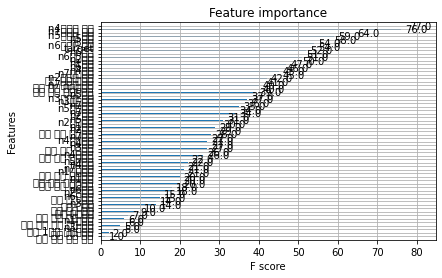

In [421]:
import xgboost 
xgboost.plot_importance(xg)

In [422]:
xg.feature_importances_

array([8.1101237e-03, 6.7966646e-03, 5.9160320e-03, 2.5986882e-03,
       6.5920884e-03, 3.4422732e-03, 2.4991285e-02, 2.5532926e-03,
       5.3114556e-03, 1.5295377e-02, 7.5039901e-03, 1.4793396e-02,
       2.1651285e-02, 1.1475250e-02, 0.0000000e+00, 7.7426564e-03,
       7.1335086e-03, 5.9951539e-03, 3.7298654e-04, 3.9132902e-01,
       8.1900740e-03, 5.1857182e-03, 6.1431825e-03, 5.1831366e-03,
       3.0715631e-03, 3.8215537e-02, 1.6616186e-02, 3.9306870e-03,
       7.9875356e-03, 3.1596350e-03, 8.2200635e-03, 4.0050853e-02,
       5.5771754e-03, 4.2528096e-03, 7.9246173e-03, 5.4612621e-03,
       8.7059978e-03, 1.0401043e-02, 5.7965717e-03, 6.4692469e-03,
       8.5743759e-03, 3.1582881e-03, 7.4507538e-03, 2.0105977e-02,
       1.2143819e-02, 5.4706489e-03, 5.4589352e-03, 8.2383184e-03,
       6.3616983e-03, 1.8686088e-02, 1.0679876e-02, 6.6376766e-03,
       4.8908168e-03, 4.6273121e-03, 1.2261951e-02, 2.9708002e-02,
       7.8269513e-03, 7.3651741e-03, 8.2896296e-03, 1.0491127e

In [125]:
pd.Series(xg.feature_importances_, x.columns).sort_values(ascending=False).head(60)

n2이슬점 온도          0.123075
n7해면기압            0.104281
n1이슬점 온도          0.073294
n6이슬점 온도          0.058861
n6해면기압            0.050172
n4이슬점 온도          0.040195
n7이슬점 온도          0.033088
n5습도              0.029432
서울 최대 풍향          0.017347
n5이슬점 온도          0.017213
서울 평균 풍속          0.016032
n3이슬점 온도          0.015209
서울 평균 이슬점온도       0.015017
n5해면기압            0.015011
n2습도              0.014902
n6습도              0.013505
서울 안개 계속 시간       0.012492
n3강수량             0.012228
n4풍속              0.012226
서울 평균 상대습도        0.011866
n4해면기압            0.011833
서울 합계 대형증발량       0.011642
n4습도              0.011030
서울 평균 전운량         0.010725
서울 평균 증기압         0.010604
n3습도              0.010588
n1풍향              0.010352
n3해면기압            0.010234
n1습도              0.009986
n2해면기압            0.009974
서울 최대 순간 풍속 풍향    0.009715
n1해면기압            0.009586
n6강수량             0.009540
서울 평균 해면기압        0.009479
서울 합계 소형증발량       0.009146
서울 일강수량           0.009111
n1풍속              0.008779
n

In [503]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [505]:
scaler = StandardScaler()
scaler.fit(x_train)

mm = MinMaxScaler()
mm.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

x_train_mm = mm.transform(x_train)
x_test_mm = mm.transform(x_test)

In [506]:
for m in model:
    m.fit(x_train_mm, y_train)
    pred = m.predict(x_test_mm)
    preds = m.predict_proba(x_test_mm)[1]
    print(classification_report(y_test, preds))
    print('='*100)

ValueError: Found input variables with inconsistent numbers of samples: [2314, 2]